In [1]:
import os
print(os.getcwd())

C:\Users\Riccardo\Documents\GitHub\DWM-Project\Progetto


In [2]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


# Sistemazione del DataFrame

In questa parte di codice andremo a modificare il DataFrame in modo che rispecchi le nostre necessità

Andiamo a controllare quanti valori nulli sono presenti per ogni colonna:

In [3]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Solamente a un film mancava la data, dopo averlo cercato abbiamo riempito il campo release_date con il dato corretto

In [4]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [5]:
convertAll(data)
convertAll(data_test)

<ipython-input-4-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-4-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-4-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-4-b2a67e616a86>:41: SettingWithCop

In [6]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [7]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'begins', 'at', 'she', 'search', 'reach', 'city', 'Arnab', 'determined', 'missing', 'She', 'not', 'Kolkata', 'is', 'except', 'arrives', 'about', 'child', 'all', 'exist.', 'a', 'Bagchi.', 'months', 'it', 'unravel', 'even', 'realises', 'seem', 'husband.', 'and', 'truth', 'relentless', 'Vidya', 'of', 'Bagchi', 'cost', 'seems.', 'find', 'city,', 'nothing', 'tries', 'on', 'end', 'what', 'in', 'when', 'soaked', 'clues', 'Balan)', 'for', 'lies,', 'everyone', 'does', 'him,', 'to', 'herself', 'With', '(Vidya', 'fragments', 'own', 'husband', 'slowly', 'dead', 'pregnant', 'from', 'her', 'alone', 'festive', 'life.', 'In', 'memories', 'that', 'Seven', 'rely', 'London', 'unborn', '-', 'the', 'convince'}


In [8]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [9]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [10]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [11]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

data_with_budget.shape: (2188, 23)


ValueError: setting an array element with a sequence.

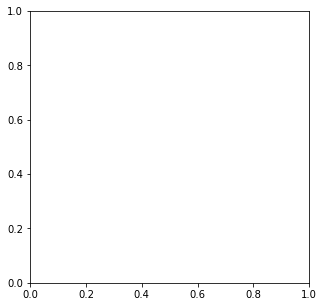

In [12]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

In [ ]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

In [ ]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [ ]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


In [ ]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

In [ ]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

# KNN

Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue.

In [ ]:
#Controlliamo che tutti i campi non contengano elementi NaN
data[["revenue","popularity", "runtime", "budget"]].info()

#Estrapoliamo i dati che useremo con l'utilizzo dell'algoritmo, convertendoli in Float per avere un tipo unico per tutti i valori:
knn_data = data[ ["revenue","popularity", "runtime", "budget"]].astype(float).values

#Prendiamo le colonne popularity, runtime, budget, con tutti i loro valori, che useremo per predirre la revenue
X = knn_data[:,1:]
print("X shape", X.shape)

#Prendiamo solo la colonna della revenue con tutti i suoi valori
y = knn_data[:,0]
print("y shape", y.shape)

A questo punto, importata la rispettiva libreria, andiamo ad utilizzare l'algoritmo KNN per predirre la revenue.

In questo caso, vedremo come 10 vicini andranno a influire nella previsioned dei dati.

In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

i = 1
while i <= 10:
    kNN = neighbors.KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X,y)

    y_pred = kNN.predict(X)

    # Computa l'accuratezza della previsione
    print ("Accuracy with", i, "neighbors")
    print (accuracy_score(y_true=y, y_pred=y_pred))
    
    i+=1

Come possiamo notare dai risultati ottenuti, più aumenta il numero di vicini che consideriamo, più l'accuratezza della nostra previsione cala.

# Linear Regression

## 1. Preparazione dei dati

Per predirre la revenue con la Regressione Lineare, prendiamo in considerazione le seguenti colonne:  

 - Lingua inglese (True/False)  
 - Mese dell'anno  
 - Budget  
 - Runtime  
 - Popolarità  
 
Di conseguenza, andremo creare la colonna "lingua_inglese" per filtrare tutti i film in lingua inglese.

In [ ]:
# Creiamo la colonna "lingua_inglese" che conterrà 1 nel caso il film abbia come 
# lingua originale l'inglese, 0 altrimenti.

data["lingua_inglese"] = 0

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data["original_language"][i]=="en":
        data["lingua_inglese"][i]=1
    else:
        data["lingua_inglese"][i]=0
    i+=1


Creiamo la colonna "release_month" che conterrà il numero corrispondente al mese di uscita del film.

In [ ]:
data["release_month"]=data["release_date"].dt.month

Sostituiamo i valori NaN nella colonna runtime con il valore della media di tale colonna.

In [ ]:
import math

i=0
n_elem = data.shape[0]
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i]=data["runtime"].mean()
    i+=1

## 2. Applicazione dell'algoritmo

A questo punto, andiamo a importare tutte le librerie a noi necessarie per la Regressione Lineare.  
Creiamo il vettore che contiene le features da analizzare: ("revenue", "budget", "runtime", "popularity", "release_month", "lingua_inglese"). 

In [ ]:
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#creo un dataframe contenente tutte le righe con le features da analizzare e predirre
dataPred=data[features]
#X contiene le righe del dataframe contenete le features da analizzare
X=dataPred.iloc[:,0:5]
#y contiene le righe del dataframe contenete le features da predirre
y=dataPred.iloc[:,5]

#splittiamo il dataframe in train e test ulitizzando la funzione di libreria apposita
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lreg=LinearRegression()

#adattiamo i dati all'algoritmo
lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

plt.scatter(y_pred, y_test)
#in rosso viene mostrata la retta delle regressione lineare
plt.plot(y_pred, y_pred, color='red')
plt.show()


score=lreg.score(X_train, y_train)
print("Lo score della Regressione Lineare è: ", score)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df